<a href="https://colab.research.google.com/github/p4arth/Mice-Protein-Expression/blob/main/proteineffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matlplotlib.pyplot as plt
from matplotlib.figure import Figure

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Data_Cortex_Nuclear.xlsx')

In [10]:
df.tail(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
1070,J3295_6,0.355136,0.588026,0.314915,2.544507,3.981010,0.224713,0.178030,3.326520,0.241857,1.236318,0.333245,0.313860,0.287617,0.280891,0.935909,0.664513,1.519715,1.435711,0.433074,0.717790,0.262297,0.361335,0.167216,1.257945,2.590400,1.204536,0.252407,0.300277,0.781353,0.169062,0.451273,2.510880,1.138072,0.444283,0.370566,0.725043,0.561255,0.331004,0.590927,...,0.419227,0.559409,0.222503,0.967694,0.156925,2.346157,0.302117,0.648867,0.973413,0.556183,0.172076,0.179725,0.124025,0.156331,0.207055,0.388192,0.125214,0.210917,0.143112,0.518752,0.355960,1.351207,2.376086,0.154994,1.237059,0.893873,0.246714,0.159896,NaN,0.124025,0.107092,0.394801,0.290680,0.163461,0.240104,1.335982,Ts65Dn,Saline,S/C,t-SC-s
1071,J3295_7,0.318448,0.509701,0.290576,2.314752,3.041115,0.229135,0.175855,2.881429,0.206036,1.088389,0.305821,0.299661,0.281491,0.277025,0.850015,0.570835,1.367570,1.271943,0.431783,0.651063,0.259778,0.342932,0.180628,1.041885,2.218509,1.073452,0.238990,0.279643,0.728365,0.170773,0.394826,2.175239,0.967508,0.400678,0.334155,0.645827,0.524946,0.295812,0.563751,...,0.365722,0.561749,0.218985,0.905377,0.163913,2.497146,0.322119,0.662862,0.801542,0.549514,0.180234,0.178632,0.127866,0.163813,0.196455,0.402023,0.127366,0.215580,0.135676,0.564033,0.341544,1.410534,2.482728,0.156403,1.196055,0.881045,0.236307,0.172424,NaN,0.127866,0.127265,0.405127,0.307199,0.192350,0.269951,1.340743,Ts65Dn,Saline,S/C,t-SC-s
1072,J3295_8,0.333438,0.514353,0.316404,2.317035,3.451893,0.235962,0.201262,2.955047,0.215457,1.118612,0.311672,0.303628,0.270347,0.300158,0.857729,0.586435,1.379811,1.354732,0.428076,0.652524,0.278233,0.385174,0.192587,1.063565,2.243375,1.120662,0.266719,0.281546,0.763407,0.172397,0.404416,2.232808,0.993218,0.405205,0.344479,0.669085,0.533754,0.310095,0.550473,...,0.379338,0.570662,0.210838,0.871462,0.152772,2.364095,0.314366,0.618941,0.754653,0.544785,0.173711,0.176910,0.117778,0.159170,0.192710,0.380283,0.124564,0.205409,0.129798,0.525785,0.338212,1.304672,2.381059,0.153839,1.167895,0.861187,0.251357,0.168864,NaN,0.117778,0.110314,0.395405,0.277821,0.170415,0.261535,1.296917,Ts65Dn,Saline,S/C,t-SC-s
1073,J3295_9,0.280946,0.528821,0.299645,2.290991,3.243548,0.246021,0.195797,2.946067,0.221759,1.141400,0.299490,0.297790,0.283109,0.264101,0.829393,0.573327,1.378303,1.320043,0.425746,0.647968,0.271055,0.353268,0.165044,1.044661,2.242312,1.077268,0.241076,0.273528,0.715036,0.170762,0.401947,2.098748,0.969247,0.409983,0.351569,0.665430,0.525267,0.302581,0.536857,...,0.387575,0.541029,0.206999,0.914382,0.154362,2.479099,0.293864,0.603068,0.873058,0.531352,0.176989,0.175743,0.122148,0.156759,0.197603,0.381496,0.129530,0.189549,0.134612,0.523778,0.336433,1.297411,2.239501,0.158965,1.235475,0.871908,0.250431,0.167114,NaN,0.122148,0.105369,0.408533,0.277181,0.182646,0.237009,1.297315,Ts65Dn,Saline,S/C,t-SC-s
1074,J3295_10,0.230977,0.423589,0.254439,1.868897,2.447210,0.209734,0.150761,2.184052,0.187381,0.949746,0.238586,0.265377,0.224794,0.245720,0.680247,0.474160,1.070704,1.127774,0.408687,0.553741,0.230501,0.304851,0.178028,0.834971,1.598288,0.877933,0.214331,0.226221,0.573557,0.158529,0.334179,1.639664,0.721306,0.334496,0.321338,0.522036,0.447527,0.244134,0.452124,...,0.313729,0.468294,0.203589,0.802441,0.174444,2.636755,0.313281,0.689591,0.787078,0.565398,0.198564,0.177315,0.117875,0.156210,0.189375,0.387653,0.133812,0.211199,0.1

In [45]:
null = df.isnull().sum().to_frame('nulls')
for index,row in null.iterrows():
  print(index,"->",row[0])

MouseID -> 0
DYRK1A_N -> 3
ITSN1_N -> 3
BDNF_N -> 3
NR1_N -> 3
NR2A_N -> 3
pAKT_N -> 3
pBRAF_N -> 3
pCAMKII_N -> 3
pCREB_N -> 3
pELK_N -> 3
pERK_N -> 3
pJNK_N -> 3
PKCA_N -> 3
pMEK_N -> 3
pNR1_N -> 3
pNR2A_N -> 3
pNR2B_N -> 3
pPKCAB_N -> 3
pRSK_N -> 3
AKT_N -> 3
BRAF_N -> 3
CAMKII_N -> 3
CREB_N -> 3
ELK_N -> 18
ERK_N -> 3
GSK3B_N -> 3
JNK_N -> 3
MEK_N -> 7
TRKA_N -> 3
RSK_N -> 3
APP_N -> 3
Bcatenin_N -> 18
SOD1_N -> 3
MTOR_N -> 3
P38_N -> 3
pMTOR_N -> 3
DSCR1_N -> 3
AMPKA_N -> 3
NR2B_N -> 3
pNUMB_N -> 3
RAPTOR_N -> 3
TIAM1_N -> 3
pP70S6_N -> 3
NUMB_N -> 0
P70S6_N -> 0
pGSK3B_N -> 0
pPKCG_N -> 0
CDK5_N -> 0
S6_N -> 0
ADARB1_N -> 0
AcetylH3K9_N -> 0
RRP1_N -> 0
BAX_N -> 0
ARC_N -> 0
ERBB4_N -> 0
nNOS_N -> 0
Tau_N -> 0
GFAP_N -> 0
GluR3_N -> 0
GluR4_N -> 0
IL1B_N -> 0
P3525_N -> 0
pCASP9_N -> 0
PSD95_N -> 0
SNCA_N -> 0
Ubiquitin_N -> 0
pGSK3B_Tyr216_N -> 0
SHH_N -> 0
BAD_N -> 213
BCL2_N -> 285
pS6_N -> 0
pCFOS_N -> 75
SYP_N -> 0
H3AcK18_N -> 180
EGR1_N -> 210
H3MeK4_N -> 270
CaNA_N -> 0
G

In [65]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

<Figure size 432x288 with 0 Axes>

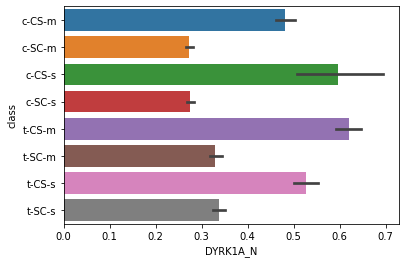

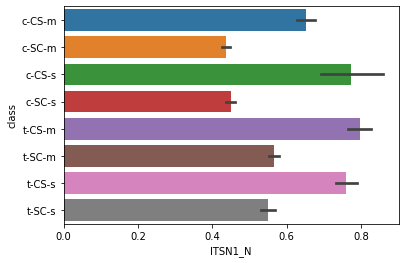

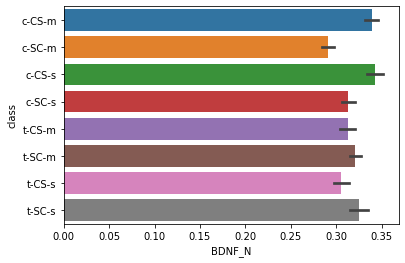

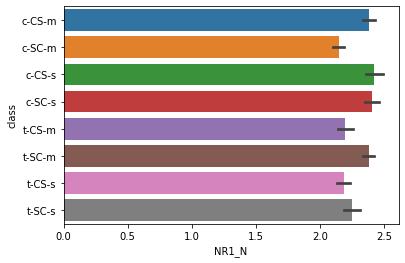

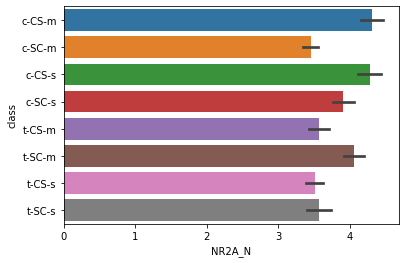

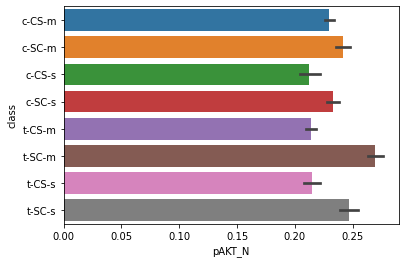

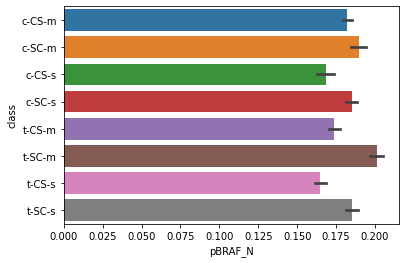

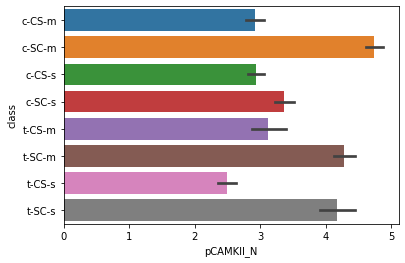

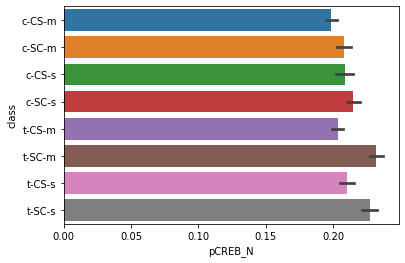

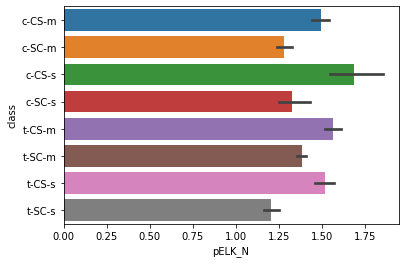

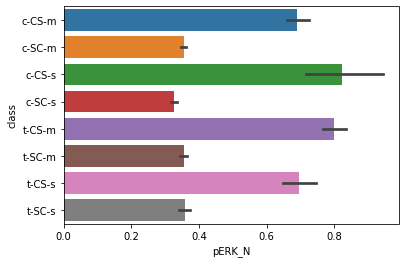

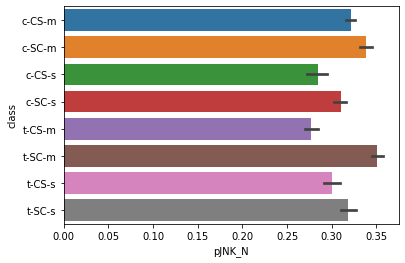

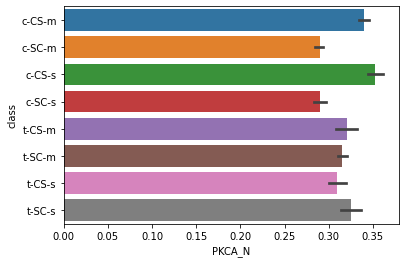

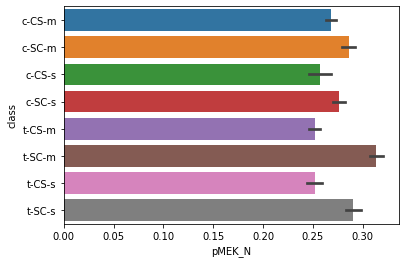

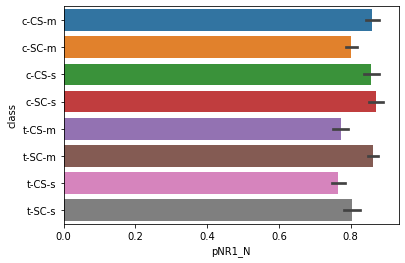

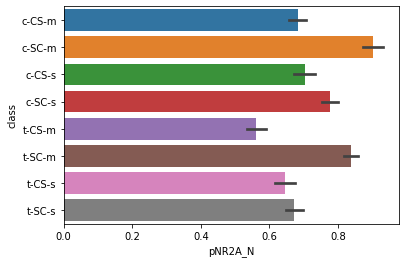

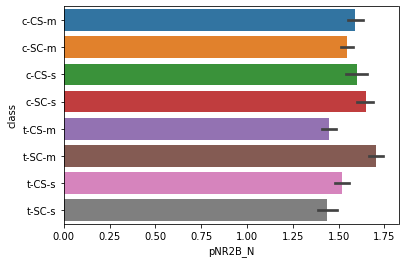

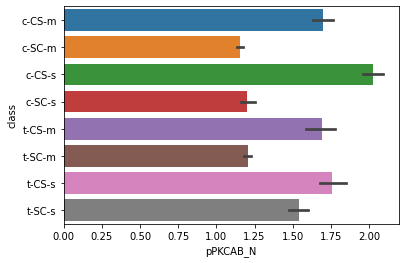

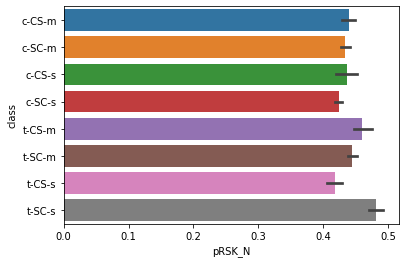

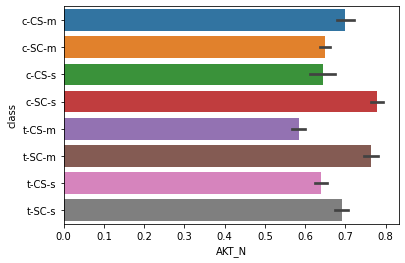

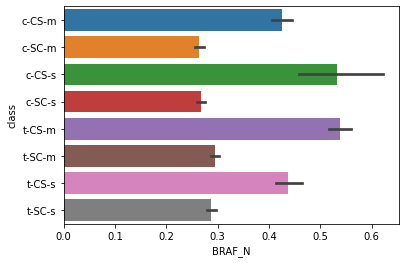

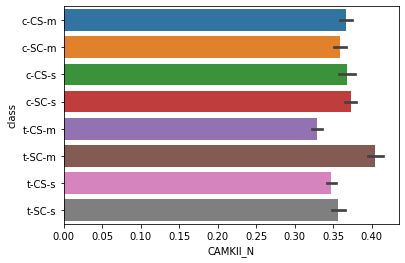

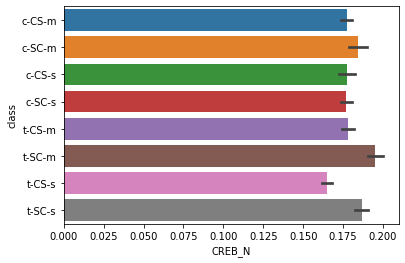

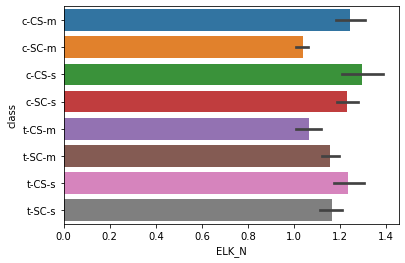

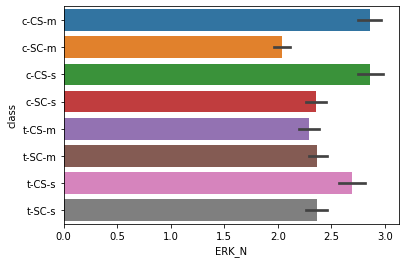

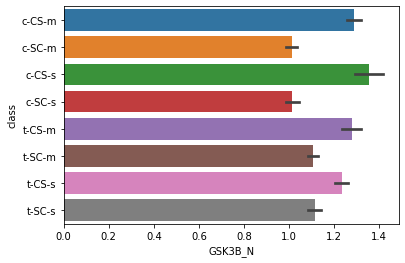

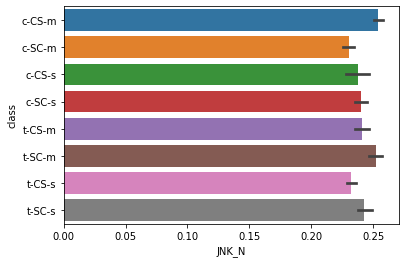

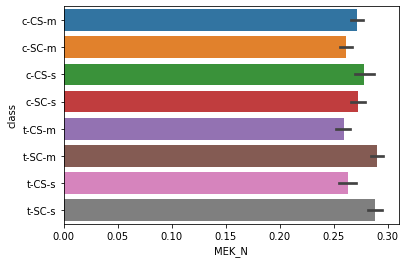

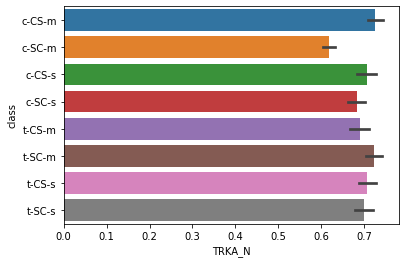

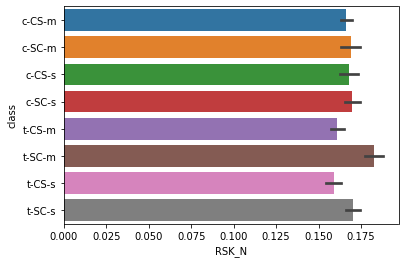

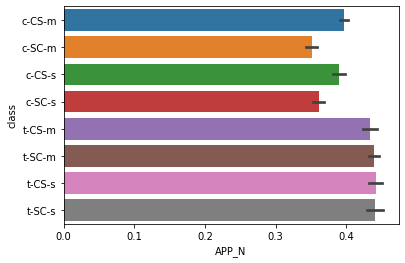

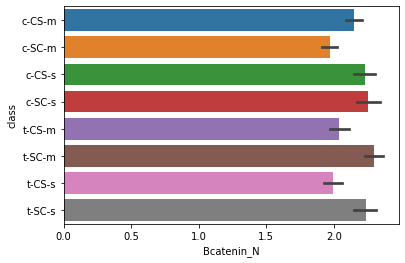

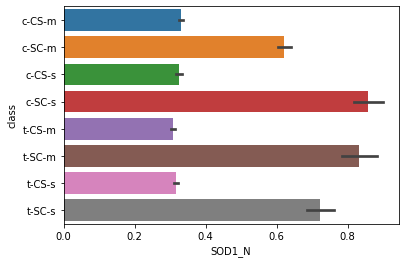

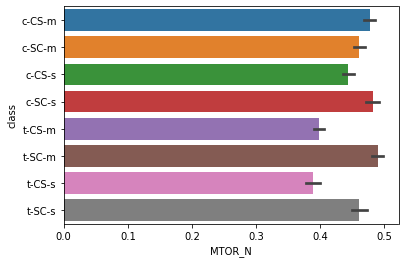

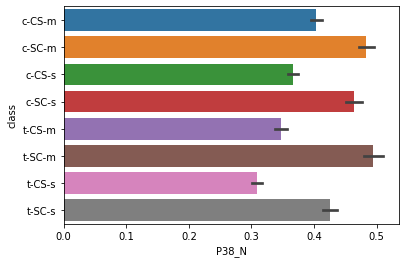

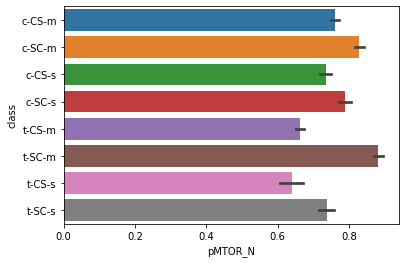

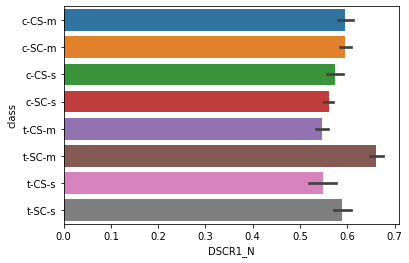

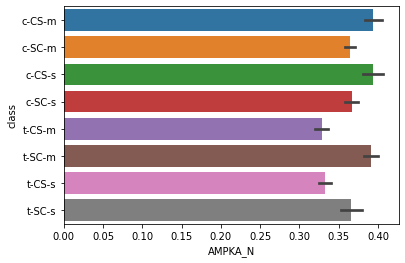

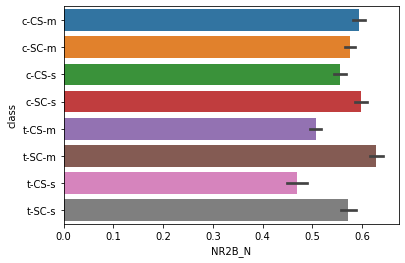

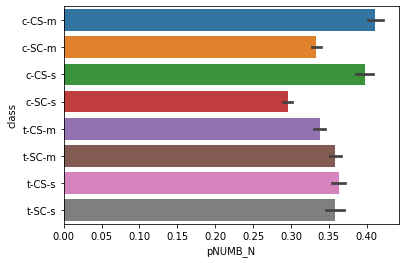

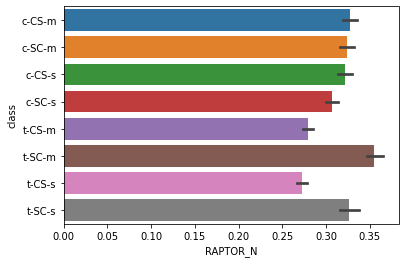

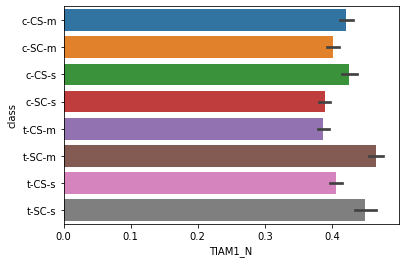

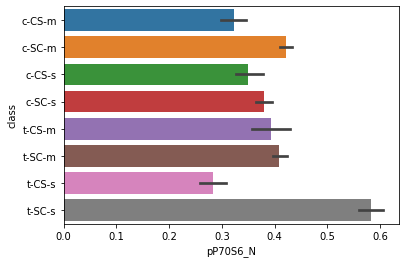

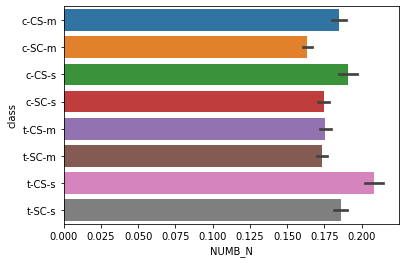

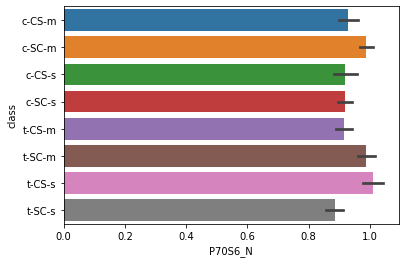

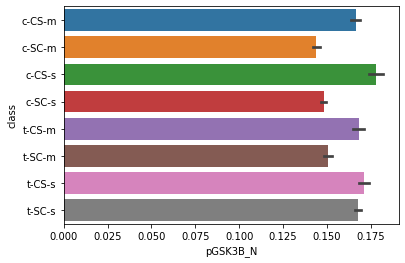

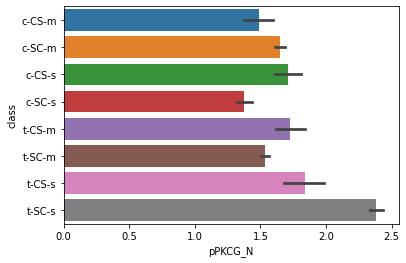

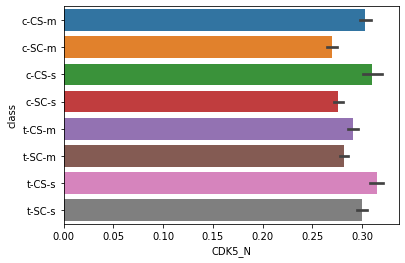

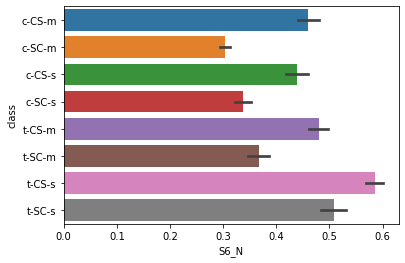

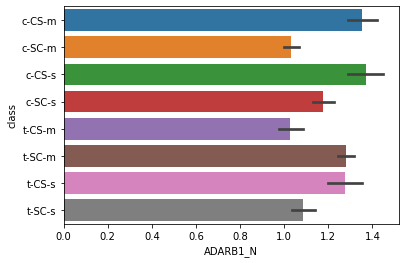

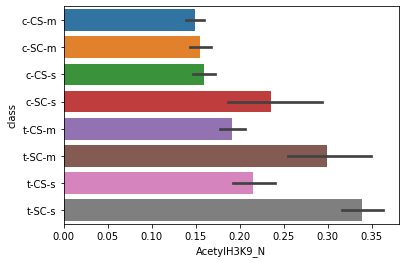

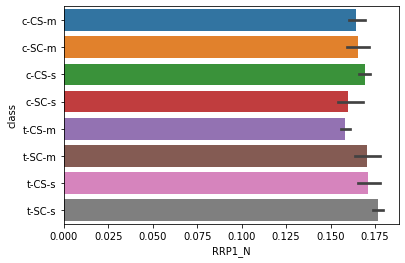

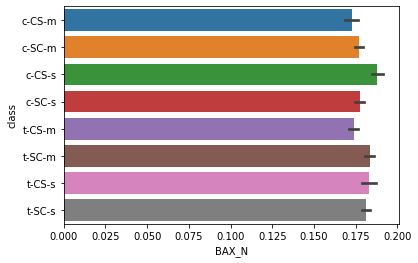

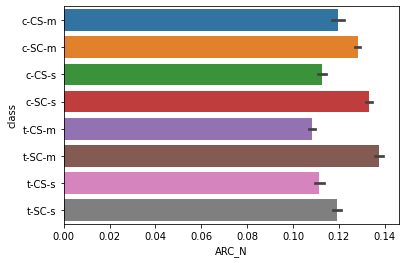

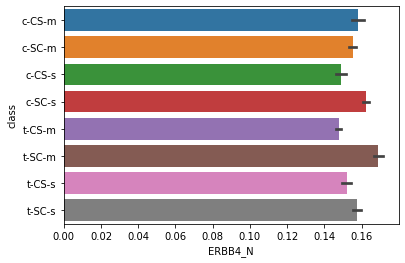

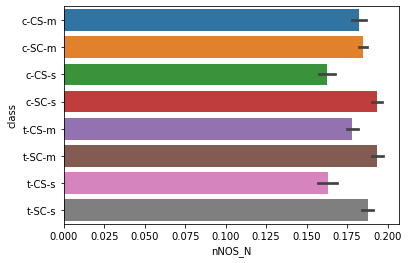

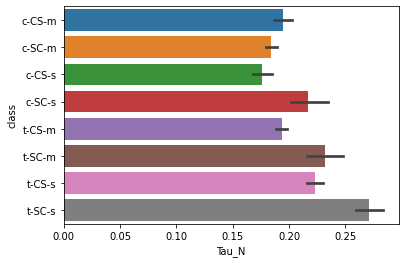

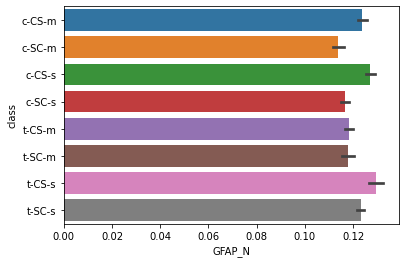

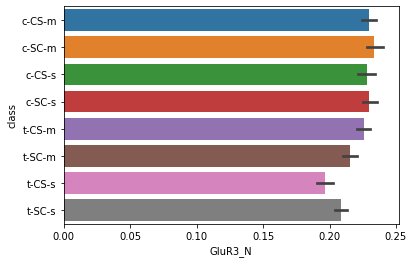

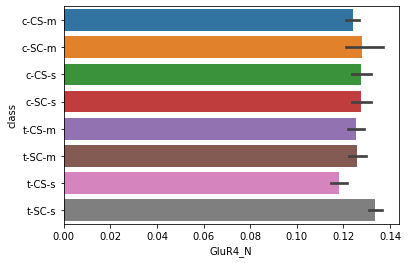

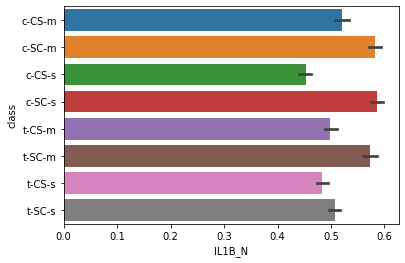

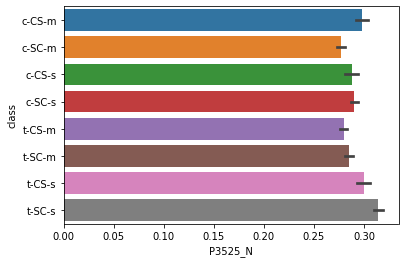

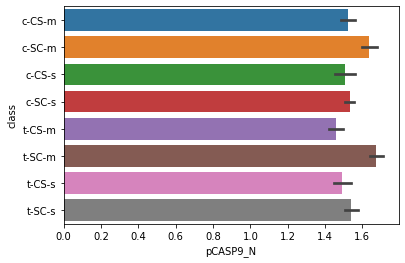

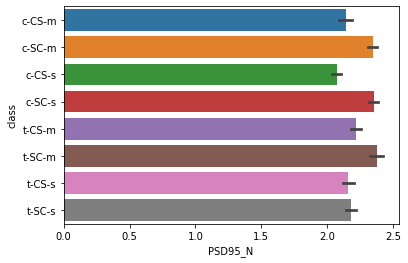

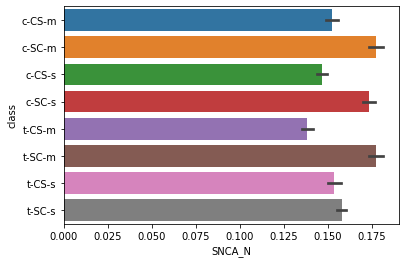

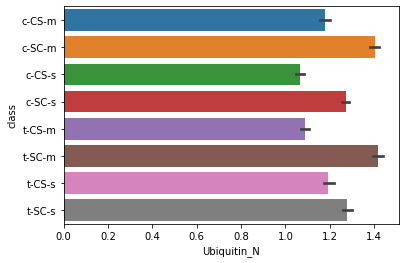

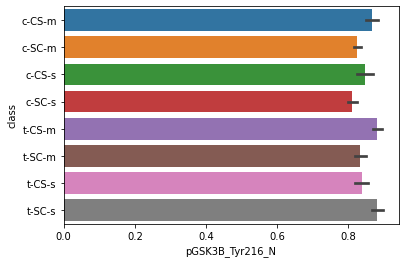

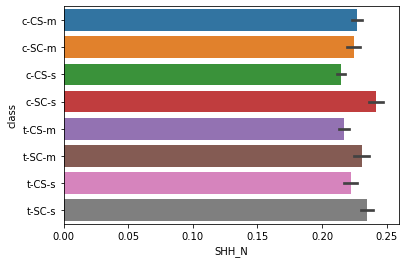

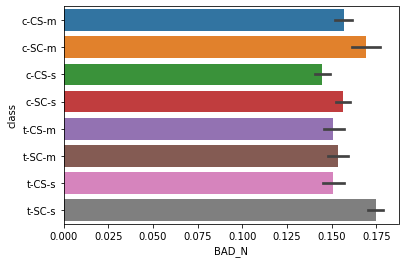

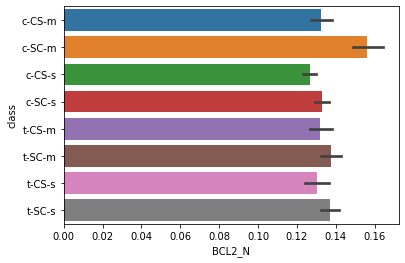

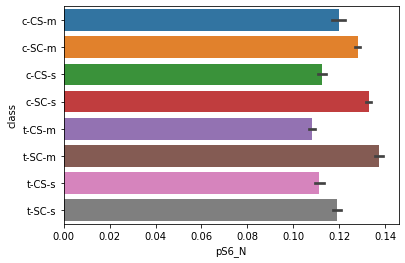

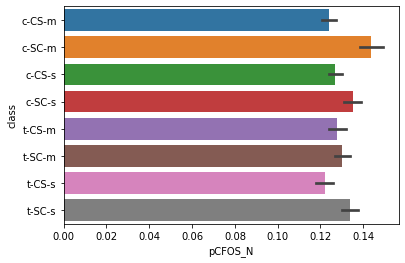

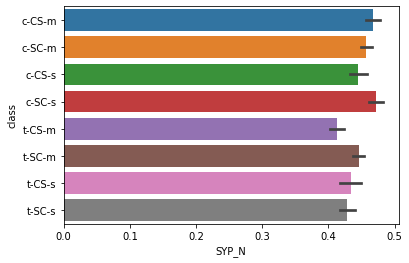

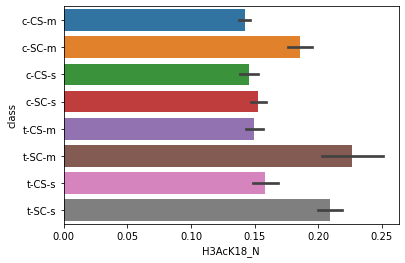

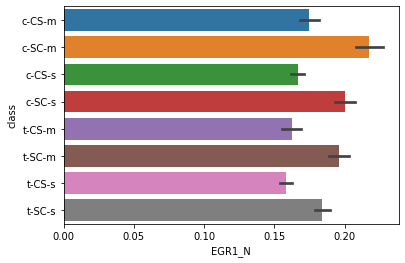

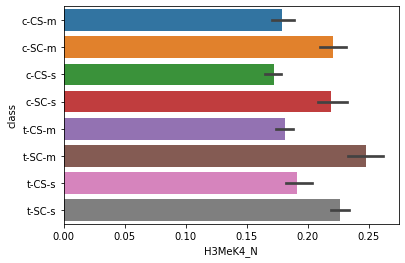

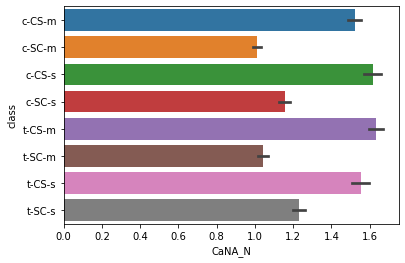

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [71]:
for i in df.columns:
  try:
    plt.figure(i)
    plot = sns.barplot(x=df[i],y=df['class'])
    plot.show()
  except:
    pass

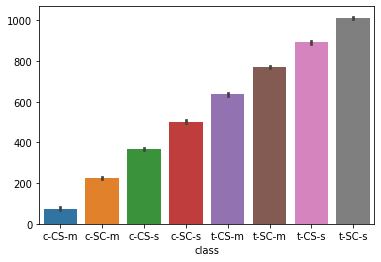

In [74]:
sns.barplot(x=df['class'],y=df.index)

In [78]:
df.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.959512,0.359433,0.294526,0.325063,-0.180959,-0.093737,-0.180169,0.047299,0.791173,0.945719,-0.115758,0.262931,-0.075735,0.201561,-0.184921,0.190832,0.378479,0.075851,0.085812,0.959578,0.033505,0.000726,0.320089,0.398452,0.769175,0.198311,0.215258,0.312241,-0.022569,0.321782,0.277694,-0.382414,-0.134906,-0.362649,-0.142262,-0.042472,0.140178,-0.065769,0.228933,-0.058016,0.106134,-0.200994,0.233226,0.142495,0.335242,-0.074921,0.198096,0.213628,0.101687,-0.170486,-0.026991,0.162327,-0.326577,-0.233143,-0.088226,0.039456,0.077392,-0.023814,-0.007312,-0.402207,-0.145071,-0.206133,-0.158898,-0.401159,-0.429043,0.322506,-0.199363,-0.253175,-0.167358,-0.326577,-0.228488,-0.047246,-0.384816,-0.323397,-0.473734,0.476033
ITSN1_N,0.959512,1.000000,0.459884,0.422492,0.426182,-0.147775,-0.076507,-0.132870,0.171122,0.780926,0.906289,-0.037600,0.338729,-0.020159,0.317561,-0.101523,0.312979,0.445472,0.124875,0.200803,0.917608,0.075535,0.012347,0.468226,0.530207,0.838842,0.253215,0.329927,0.454249,-0.003534,0.441473,0.418977,-0.323622,-0.120840,-0.384926,-0.100517,-0.035599,0.195132,-0.026333,0.261104,-0.063872,0.170697,-0.209752,0.377573,0.262547,0.372292,-0.026121,0.294561,0.313405,0.205371,-0.149968,-0.061994,0.265446,-0.256573,-0.125944,0.013171,0.085142,0.039787,-0.024500,0.029569,-0.386470,-0.068782,-0.111027,-0.078903,-0.433239,-0.371872,0.382496,-0.200833,-0.327136,-0.257745,-0.256573,-0.309593,0.042422,-0.347339,-0.399856,-0.511433,0.517782
BDNF_N,0.359433,0.459884,1.000000,0.805784,0.749993,0.317537,0.390530,0.246760,0.603857,0.451598,0.351388,0.464904,0.770690,0.474147,0.754279,0.359175,0.698359,0.568484,0.341372,0.608680,0.331664,0.570094,0.425910,0.731773,0.736353,0.670463,0.632191,0.766614,0.800254,0.390159,0.640633,0.737491,-0.001086,0.501561,0.108920,0.451593,0.405527,0.716018,0.572420,0.606793,0.477531,0.617848,0.086524,0.398205,0.209857,0.360808,0.071666,0.385101,0.107623,0.593209,-0.101175,0.015496,0.407293,0.127703,0.202806,0.182694,-0.015964,0.062668,-0.031828,0.142362,-0.264937,0.206146,0.056650,0.043637,-0.182768,0.051538,0.183629,-0.080776,-0.186508,-0.146526,0.127703,-0.254218,0.450433,-0.135637,-0.239907,-0.244732,0.262578
NR1_N,0.294526,0.422492,0.805784,1.000000,0.873889,0.211540,0.244224,0.301151,0.597443,0.416629,0.273353,0.444001,0.614342,0.377457,0.947872,0.510043,0.895077,0.443719,0.239082,0.703446,0.234594,0.467345,0.193995,0.818820,0.807778,0.670692,0.532911,0.694638,0.856851,0.255331,0.520926,0.914610,0.162459,0.405647,0.042114,0.487358,0.244220,0.629025,0.522296,0.395671,0.265575,0.466602,-0.031230,0.537329,0.420642,0.184423,-0.023829,0.356264,0.098321,0.573962,-0.157034,-0.135693,0.482910,0.264181,0.266332,0.398612,-0.057142,-0.140452,0.153647,0.197504,-0.200467,0.122002,0.173310,0.312445,-0.232277,0.106177,0.202998,-0.141423,-0.386577,-0.321790,0.264181,-0.374932,0.473366,-0.234171,-0.319672,-0.351958,0.205463
NR2A_N,0.325063,0.426182,0.749993,0.873889,1.000000,0.110172,0.111143,0.280733,0.392695,0.409502,0.330732,0.391541,0.550545,0.260422,0.869717,0.509987,0.859868,0.408119,0.124604,0.683712,0.245245,0.369838,0.089283,0.779813,0.851140,0.650710,0.433602,0.577770,0.758660,0.061866,0.455952,0.866680,0.028548,0.373060,-0.022546,0.464045,0.256704,0.677325,0.488996,0.524009,0.314626,0.499319,-0.158502,0.528100,0.438078,0.165357,-0.163034,0.334461,0.070864,0.672992,-0.190525,-0.113369,0.556025,0.262492,0.210579,0